In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_curve, auc, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('C:/Users/hi/OneDrive/Desktop/AI_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df.shape

(614, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
print("\nNumber of Missing Values in Each Column:")
print(df.isnull().sum())


Number of Missing Values in Each Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [23]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [24]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [25]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [26]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [27]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [28]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [29]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [30]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

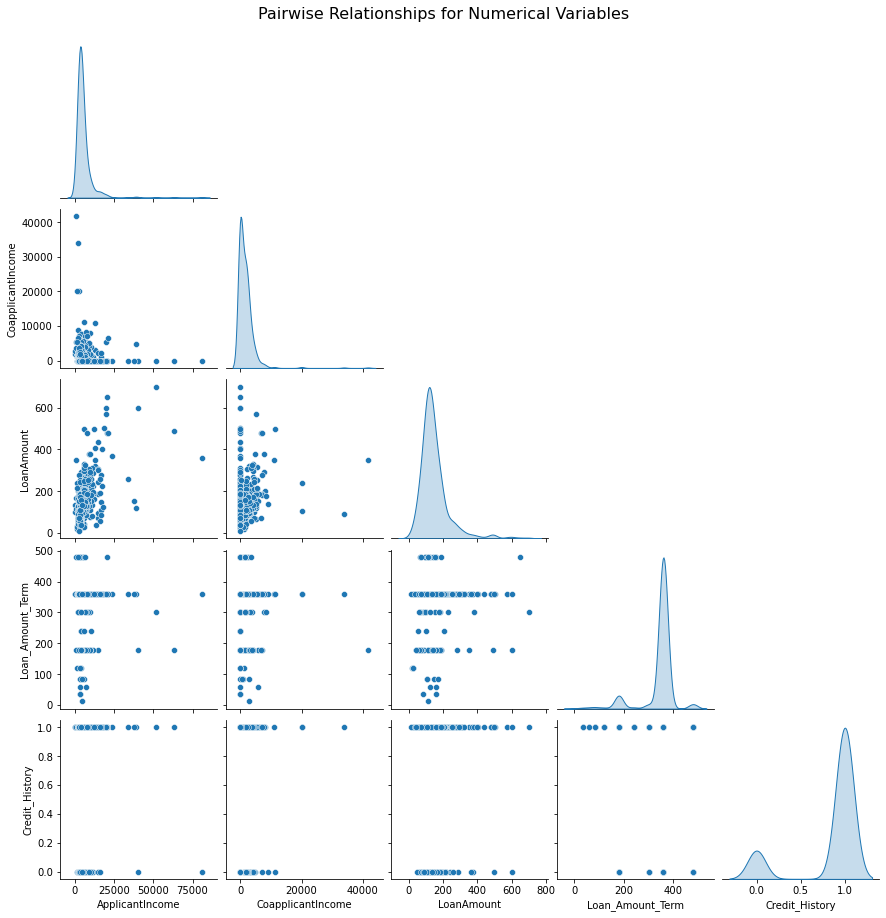

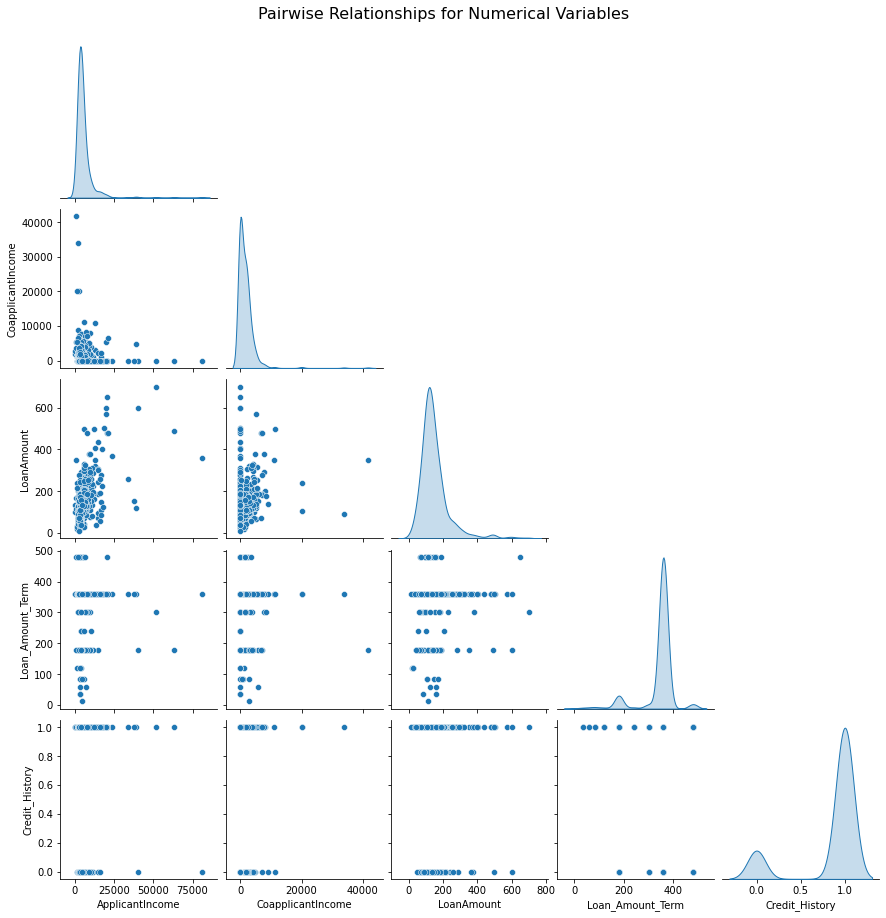

In [32]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Pairplot for numerical variables
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)

# By Adding a title to the plot
plt.suptitle('Pairwise Relationships for Numerical Variables', y=1.02, fontsize=16)
plt.show()# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Pairplot for numerical variables
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)

# By Adding a title to the plot
plt.suptitle('Pairwise Relationships for Numerical Variables', y=1.02, fontsize=16)
plt.show()

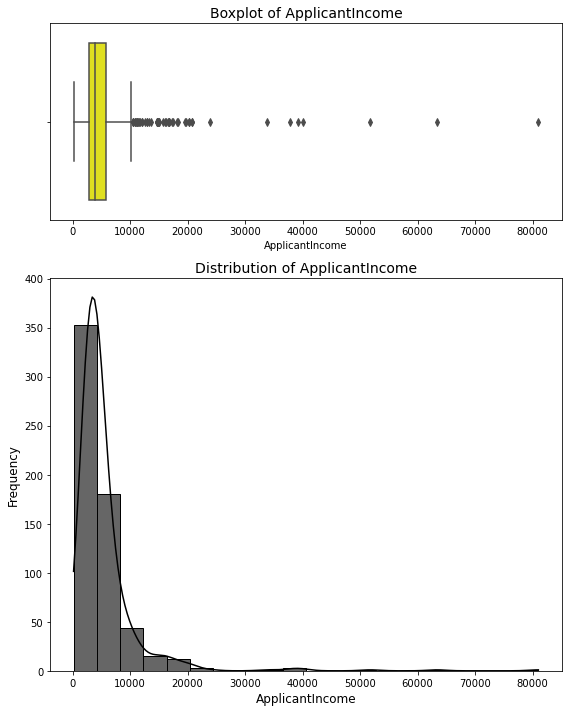

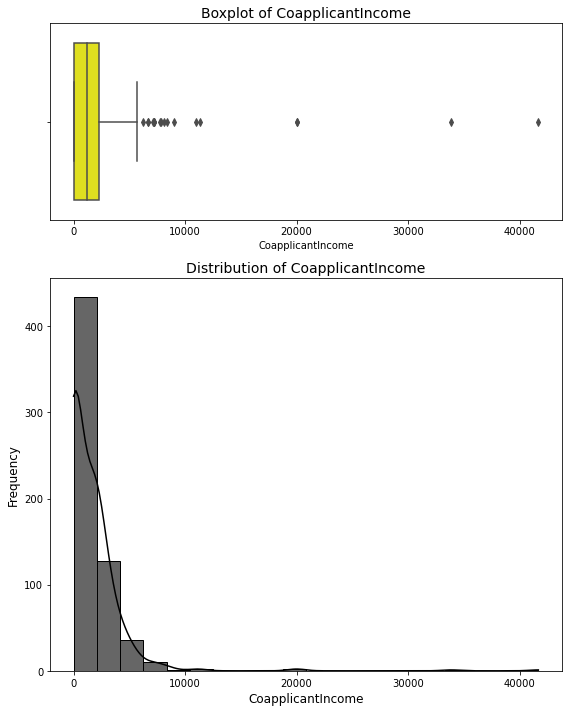

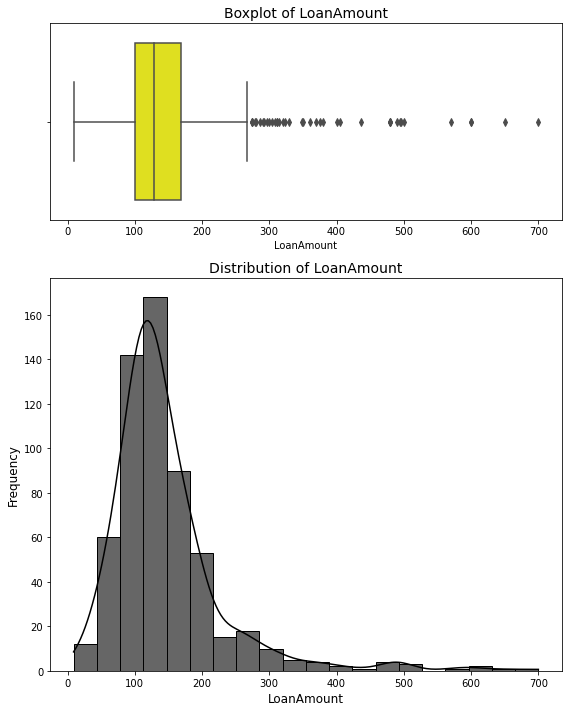

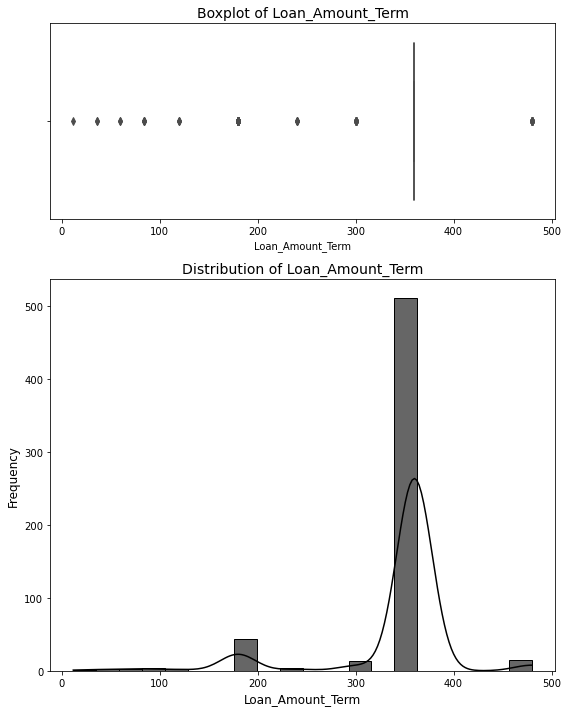

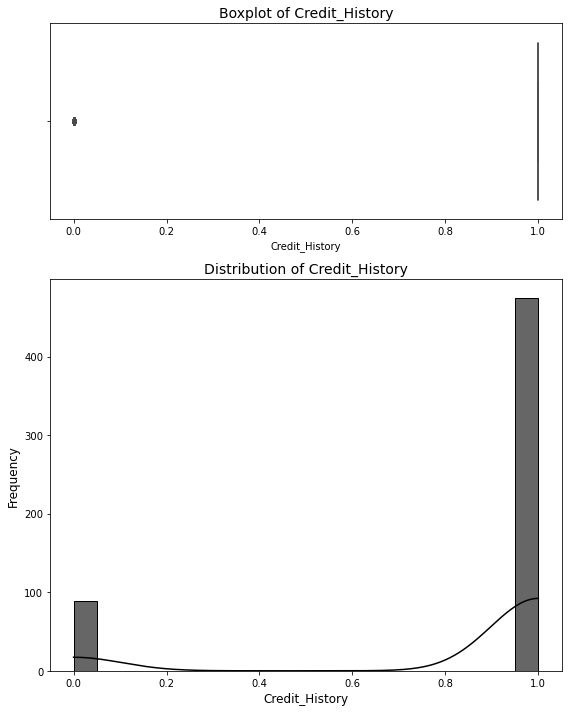

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:/Users/hi/OneDrive/Desktop/AI_dataset.csv')  

# Extract numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting
for column in numerical_columns:
    fig, ax = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 4]})

    # Boxplot
    sns.boxplot(x=df[column], ax=ax[0], color='yellow')
    ax[0].set_title(f'Boxplot of {column}', fontsize=14)

    # Histogram and KDE
    sns.histplot(df[column], kde=True, ax=ax[1], color='black', bins=20, alpha=0.6)
    ax[1].set_title(f'Distribution of {column}', fontsize=14)
    ax[1].set_xlabel(column, fontsize=12)
    ax[1].set_ylabel('Frequency', fontsize=12)

    plt.tight_layout()
    plt.show()

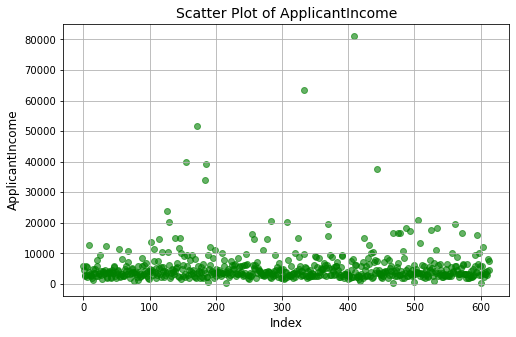

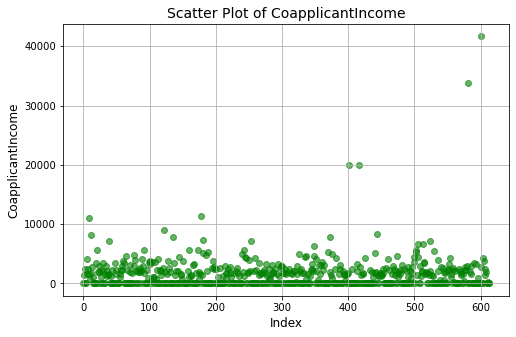

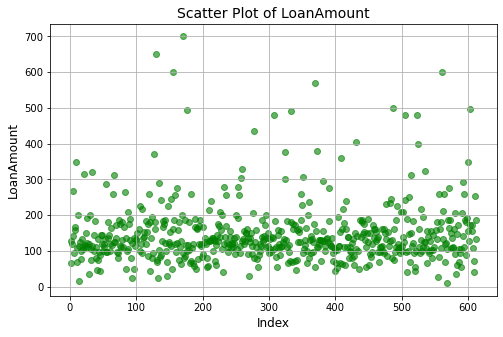

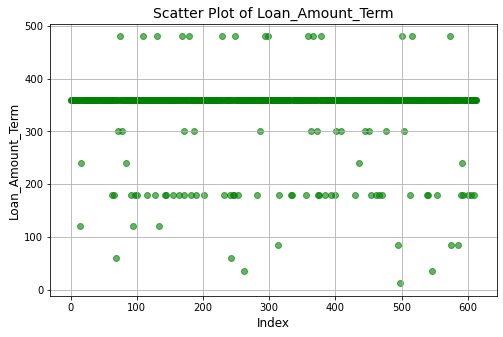

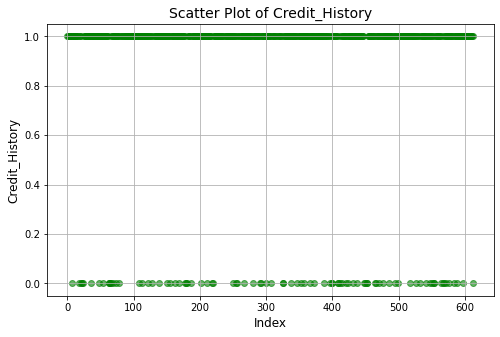

In [34]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(df[column])), df[column], alpha=0.6, color='green')
    plt.title(f'Scatter Plot of {column}', fontsize=14)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True)
    plt.show()

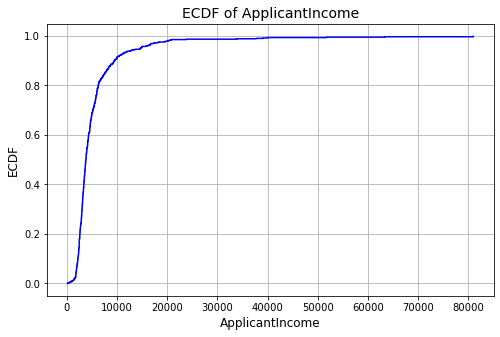

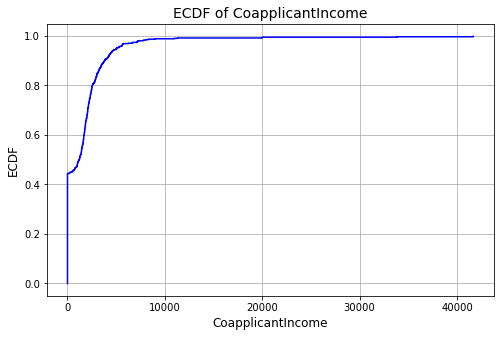

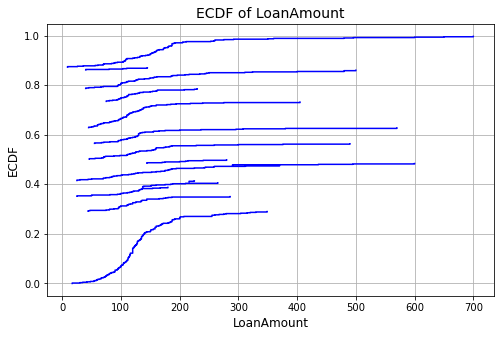

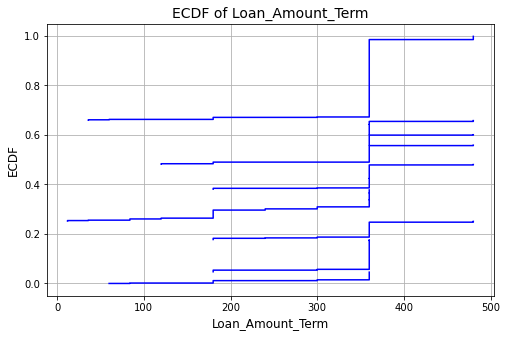

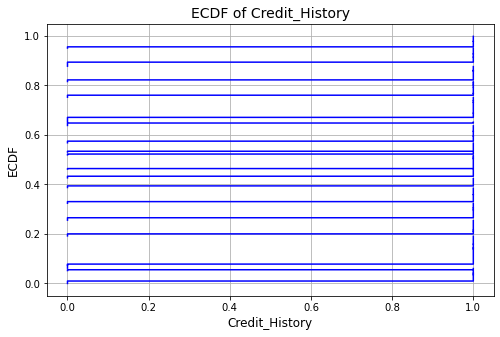

In [35]:
for column in numerical_columns:
    sorted_data = sorted(df[column])
    y = [i / len(sorted_data) for i in range(len(sorted_data))]

    plt.figure(figsize=(8, 5))
    plt.step(sorted_data, y, where='post', color='blue')
    plt.title(f'ECDF of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('ECDF', fontsize=12)
    plt.grid(True)
    plt.show()

In [36]:
# Step 3: Iteratively Explore Each Feature
for column in df.columns:
    print(f"\n--- Feature: {column} ---")
    print(f"Data Type: {df[column].dtype}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    print(f"Unique Values: {df[column].unique()[:13]}") 


--- Feature: Loan_ID ---
Data Type: object
Number of Unique Values: 614
Unique Values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028']

--- Feature: Gender ---
Data Type: object
Number of Unique Values: 2
Unique Values: ['Male' 'Female' nan]

--- Feature: Married ---
Data Type: object
Number of Unique Values: 2
Unique Values: ['No' 'Yes' nan]

--- Feature: Dependents ---
Data Type: object
Number of Unique Values: 4
Unique Values: ['0' '1' '2' '3+' nan]

--- Feature: Education ---
Data Type: object
Number of Unique Values: 2
Unique Values: ['Graduate' 'Not Graduate']

--- Feature: Self_Employed ---
Data Type: object
Number of Unique Values: 2
Unique Values: ['No' 'Yes' nan]

--- Feature: ApplicantIncome ---
Data Type: int64
Number of Unique Values: 505
Unique Values: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073]

--- Feature: CoapplicantIncome ---
Data T

In [37]:
# Check if column exists before calculating missing values:
if column in df.columns:
        print(f"Missing Columns: {df[column].isnull().sum()}")
        print(f"Percentage of Columns: {df[column].isnull().mean() * 100:.2f}%")
else:
        print(f"Column '{column}' not found in DataFrame.")

Missing Columns: 0
Percentage of Columns: 0.00%


In [38]:
# Step 4: Correlation Analysis (For Numerical Features only)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Features:", list(numerical_features))


Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [39]:
# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


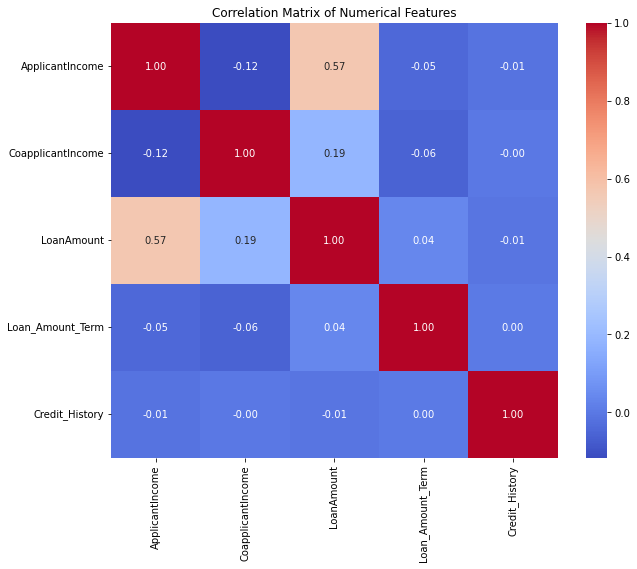

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

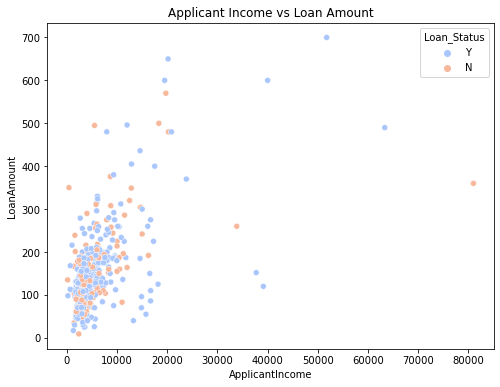

In [41]:
if 'ApplicantIncome' in df.columns and 'LoanAmount' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='coolwarm')
    plt.title('Applicant Income vs Loan Amount')
    plt.xlabel('ApplicantIncome')
    plt.ylabel('LoanAmount')
    plt.show()

In [42]:
df = df.drop(['Loan_ID'], axis = 1)

In [43]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [44]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [45]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

In [46]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [47]:
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [49]:
print("\nFinal Dataset Overview:\n", df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB

Final Dataset Overview:
 None
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No        

In [50]:
Q1 = df[numerical_features].quantile(0.25)  # 25th percentile
Q3 = df[numerical_features].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in numeric features
df_outliers_removed = df[~((df[numerical_features] < lower_bound) |
                           (df[numerical_features] > upper_bound)).any(axis=1)]

print(f"Shape after removing outliers: {df_outliers_removed.shape}")

Shape after removing outliers: (350, 12)


                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112545    0.541994   
CoapplicantIncome        -0.112545           1.000000    0.189822   
LoanAmount                0.541994           0.189822    1.000000   
Loan_Amount_Term          0.025980          -0.076546    0.079030   
Credit_History           -0.007509          -0.012281    0.007552   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.025980       -0.007509  
CoapplicantIncome         -0.076546       -0.012281  
LoanAmount                 0.079030        0.007552  
Loan_Amount_Term           1.000000       -0.017882  
Credit_History            -0.017882        1.000000  


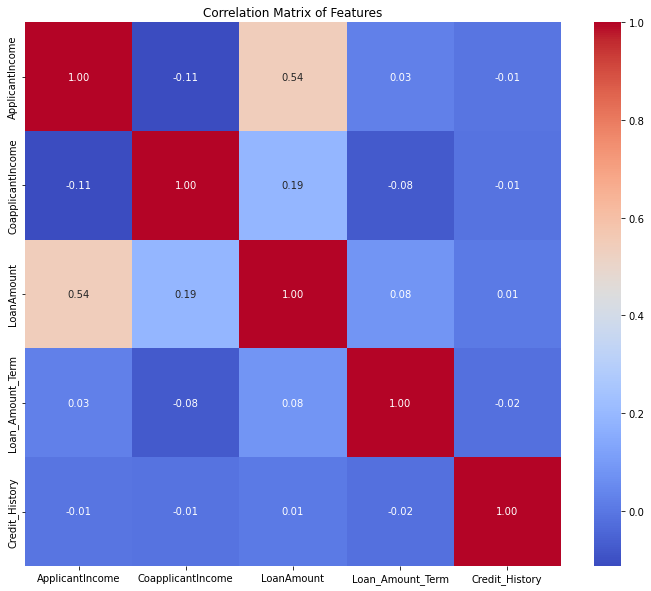

In [54]:
# Assuming your preprocessed data is in X_train
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Display the correlation matrix (optional for understanding)
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [55]:
correlation_threshold = 0.8

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features from your training and testing data
X_train_reduced = X_train.drop(columns=highly_correlated_features)
X_test_reduced = X_test.drop(columns=highly_correlated_features)

# Display the remaining features
print("Remaining Features after Correlation-based Reduction:", X_train_reduced.columns)

Remaining Features after Correlation-based Reduction: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


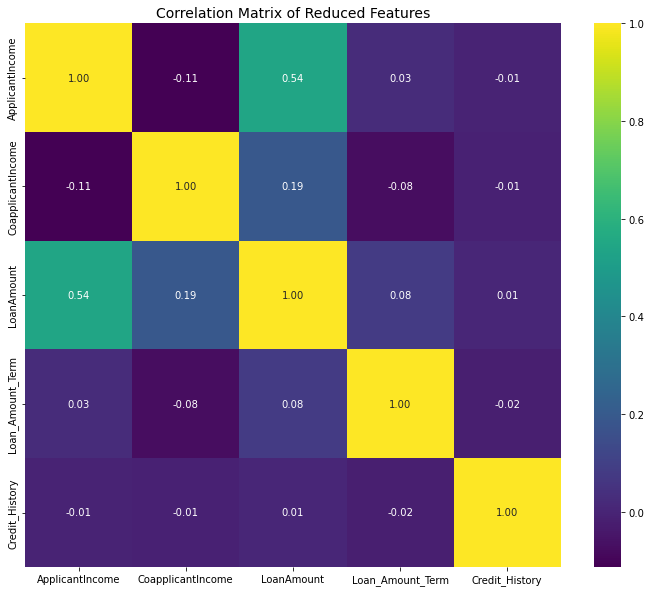

In [56]:
# Calculate the correlation matrix for the reduced features
reduced_correlation_matrix = X_train_reduced.corr()

# Visualize the reduced correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of Reduced Features", fontsize=14)
plt.show()

In [57]:
print("Shape of X_train before reduction:", X_train.shape)
print("Shape of X_train after reduction:", X_train_reduced.shape)

Shape of X_train before reduction: (491, 11)
Shape of X_train after reduction: (491, 11)


In [60]:
print("Training Data Shape:", X_train_reduced.shape)
print("Testing Data Shape:", X_test_reduced.shape)
print("\nSample of Preprocessed Training Data:\n", X_train_reduced.head())
print("Sample of Preprocessed Testing Data:")
print(X_test_reduced.head())

Training Data Shape: (491, 11)
Testing Data Shape: (123, 11)

Sample of Preprocessed Training Data:
     Gender Married Dependents Education Self_Employed  ApplicantIncome  \
83    Male     Yes          0  Graduate            No           6000.0   
90    Male     Yes          0  Graduate            No           2958.0   
227   Male     Yes          2  Graduate            No           6250.0   
482   Male     Yes          0  Graduate            No           2083.0   
464   Male      No          0  Graduate            No           4166.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
83              2250.0       265.0             360.0        0.842199   
90              2900.0       131.0             360.0        1.000000   
227             1695.0       210.0             360.0        1.000000   
482             3150.0       128.0             360.0        1.000000   
464                0.0        98.0             360.0        0.000000   

    Property_Area  
8

In [61]:
print(X_train_reduced.isnull().sum())
print(X_test_reduced.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [30]:
#MODEL BUILDING AND EVALUATION

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = r'C:\Users\hi\OneDrive\Desktop\AI_dataset.csv'
data = pd.read_csv(file_path)

In [7]:
data.fillna({
    'Gender': 'Unknown',
    'Married': 'Unknown',
    'Dependents': 'Unknown',
    'Self_Employed': 'Unknown',
    'LoanAmount': data['LoanAmount'].mean(),
    'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],
    'Credit_History': data['Credit_History'].mode()[0],
}, inplace=True)

<Figure size 576x432 with 0 Axes>

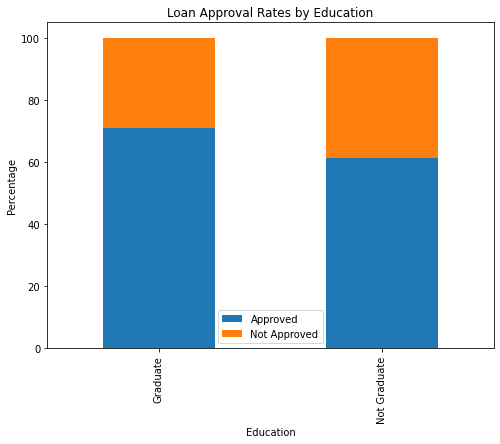

In [8]:
plt.figure(figsize=(8, 6))
edu_approval = data.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
edu_approval[['Y', 'N']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Loan Approval Rates by Education')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.legend(['Approved', 'Not Approved'])
plt.show()

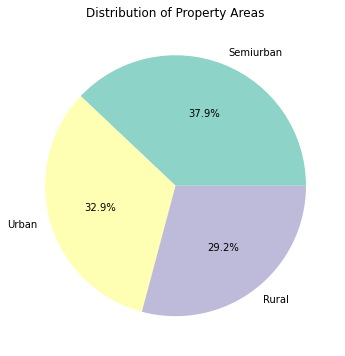

In [9]:
plt.figure(figsize=(6, 6))
property_distribution = data['Property_Area'].value_counts()
property_distribution.plot.pie(autopct='%1.1f%%', colors=['#8dd3c7', '#ffffb3', '#bebada'])
plt.title('Distribution of Property Areas')
plt.ylabel('')
plt.show()

In [10]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


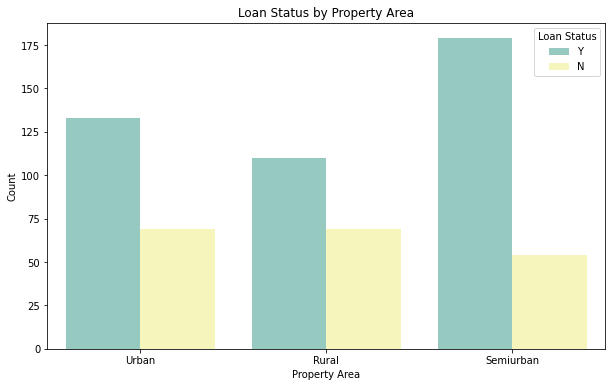

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, palette='Set3')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import os


file_path = r'C:\Users\hi\OneDrive\Desktop\AI_dataset.csv'


if not os.path.exists(file_path):
    print(f"Error: Dataset file '{file_path}' not found. Please provide the correct file path.")
    exit()


df = pd.read_csv(file_path)


df = df.dropna(subset=['Loan_Status'])

numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())


categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


label_encoders = {}
for col in categorical_columns + ['Education', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


joblib.dump(model, 'loan_prediction_model.pkl')


def predict_loan_status(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)

    for col in categorical_columns + ['Education', 'Property_Area']:
        input_df[col] = label_encoders[col].transform(input_df[col])
        
    prediction = model.predict(input_df)
    return "Approved" if prediction[0] == 1 else "Rejected"

new_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}
print(f"Loan Prediction: {predict_loan_status(new_data)}")

Accuracy: 75.61%
Confusion Matrix:
[[18 25]
 [ 5 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Loan Prediction: Approved
